In [1]:
import os
import requests




#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

#functions
#import wrangle as wr
#import acquire

warnings.filterwarnings("ignore")

#evaluate
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from statsmodels.formula.api import ols
import sklearn.preprocessing

#feature engineering
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#Grab that CSV
#values in csv are separated by semicolon, call that argument with sep=';'
ids = {
    # Google drive file ids for building download urls
    'white': '14BJY5EBlyxuELN_diunepjAnDBDsjtlh',
    'red': '1NT2qJuMDwcz2devXVL5jUMPKe4K70awO'
}

In [3]:
paths = {
    'white': 'data/winequality-white.csv',
    'red' :'data/winequality-red.csv',
    'both': 'data/winequality-both.csv'
}

In [4]:
def white_get_data():
    path = paths['white']
    if not os.path.exists(path):
        url = gdrive_url(ids['white'])
        download(url, path)
    df = pd.read_csv(path, delimiter=';')
    return df

In [5]:
def gdrive_url(file_id):
    """Gets a google drive download url for a specific file ID"""
    url = f'https://drive.google.com/uc?export=download&id={file_id}'
    return url

In [6]:
def download(url, path):
    """Downloads the binary content from a url to the specified path."""
    import requests
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f'Error: Status {response.status_code}')
    with open(path, 'wb') as f:
        f.write(response.content)

In [7]:
import pandas as pd

white = pd.read_csv('https://query.data.world/s/wz2wudwaopqoejdhhmwo3aextous2h', sep= ';')

In [8]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
# Get underscores in there
white = white.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity','citric acid':'citric_acid','residual sugar':'residual_sugar',
'free sulfur dioxide':'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'})

In [11]:
white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [12]:
white.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile_acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric_acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual_sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free_sulfur_dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total_sulfur_dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [26]:
# Manually handle outliers
white = white[white.volatile_acidity <= .690]
    
white = white[white.residual_sugar <= 26]

white = white[white.chlorides < .250]

white = white[white.free_sulfur_dioxide <= 200]
    
white = white[white.total_sulfur_dioxide <= 200]

white = white[white.sulphates < .900]

white = white[white.citric_acid < 1.25]

In [14]:
white = white.drop_duplicates()
white.count()

fixed_acidity           3601
volatile_acidity        3601
citric_acid             3601
residual_sugar          3601
chlorides               3601
free_sulfur_dioxide     3601
total_sulfur_dioxide    3601
density                 3601
pH                      3601
sulphates               3601
alcohol                 3601
quality                 3601
dtype: int64

In [15]:
#[white.volatile_acidity > .650].value_count

#white['volatile_acidity'].value_counts(ascending=True)

#white.volatile_acidity.value_counts().loc[lambda x: x>.65].reset_index()['index']

white.loc[(white.volatile_acidity > .650)]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
23,7.6,0.670,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5
178,6.0,0.670,0.07,1.2,0.060,9.0,108.0,0.99310,3.11,0.35,8.7,4
221,7.2,0.685,0.21,9.5,0.070,33.0,172.0,0.99710,3.00,0.55,9.1,6
1040,8.2,0.680,0.30,2.1,0.047,17.0,138.0,0.99500,3.22,0.71,10.8,4
2651,6.4,0.680,0.26,3.4,0.069,25.0,146.0,0.99347,3.18,0.40,9.3,5
3165,6.1,0.680,0.52,1.4,0.037,32.0,123.0,0.99022,3.24,0.45,12.0,6
3571,5.9,0.655,0.00,5.6,0.033,8.0,31.0,0.99360,3.32,0.51,10.5,4
3710,4.7,0.670,0.09,1.0,0.020,5.0,9.0,0.98722,3.30,0.34,13.6,5
4597,6.7,0.660,0.00,13.0,0.033,32.0,75.0,0.99551,3.15,0.50,10.7,6


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3918,6.4,0.35,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7
4503,5.8,0.61,0.01,8.4,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7


Text(0.5, 1.0, 'residual_sugar')

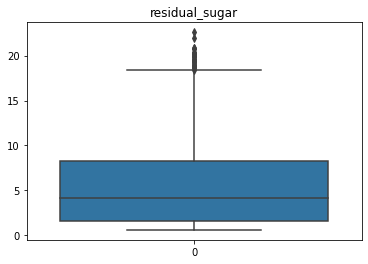

In [16]:
sns.boxplot(data=white.residual_sugar);
plt.title("residual_sugar")

Text(0.5, 1.0, 'chlorides')

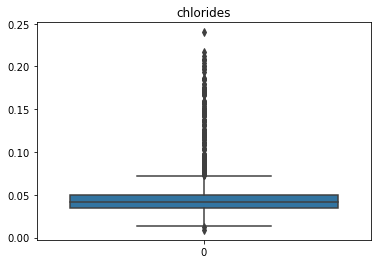

In [17]:
sns.boxplot(data=white.chlorides);
plt.title("chlorides")

Text(0.5, 1.0, 'sulphates')

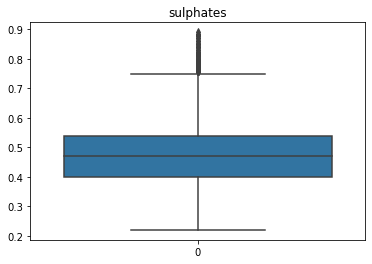

In [18]:
sns.boxplot(data=white.sulphates);
plt.title("sulphates")

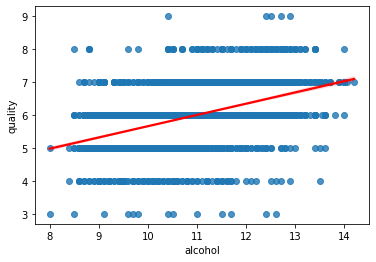

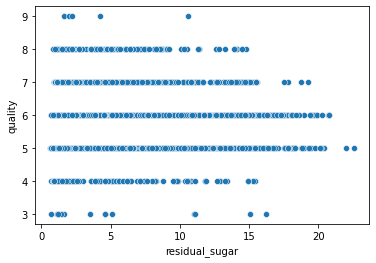

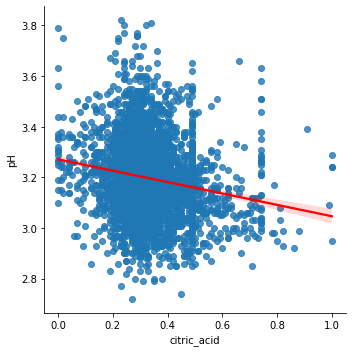

In [27]:
sns.regplot(data=white, x='alcohol', y='quality', line_kws = {'color':'red'} )
plt.show()
sns.scatterplot(data=white, x='residual_sugar', y='quality',)
plt.show()
sns.lmplot(data=white, x='citric_acid', y='pH', line_kws = {'color':'red'})
plt.show()

In [20]:
white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

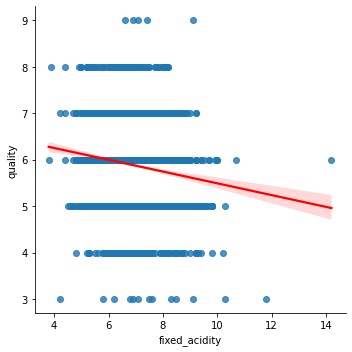

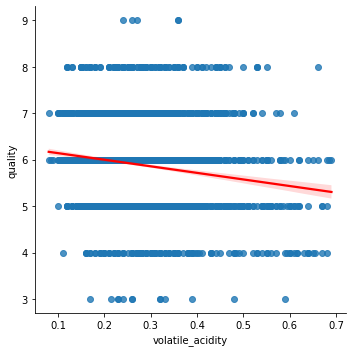

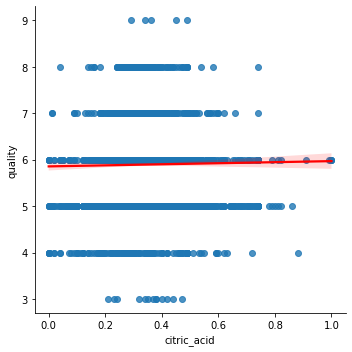

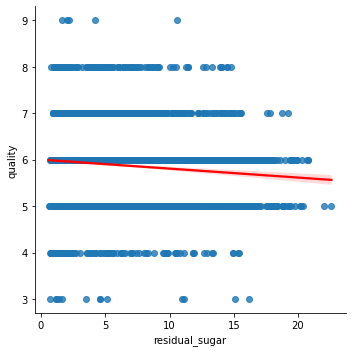

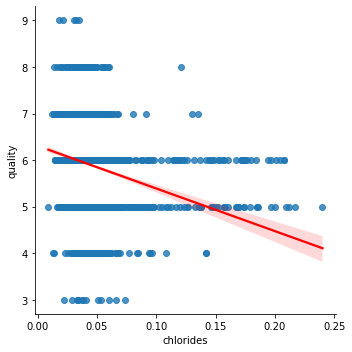

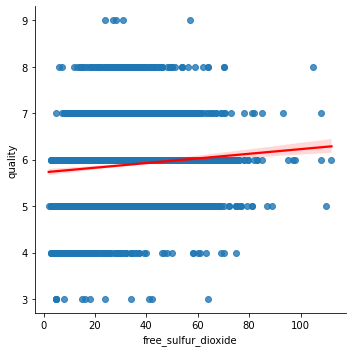

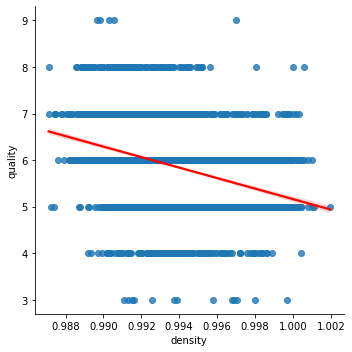

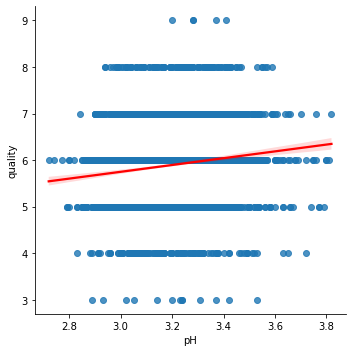

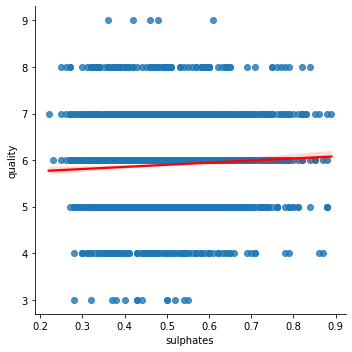

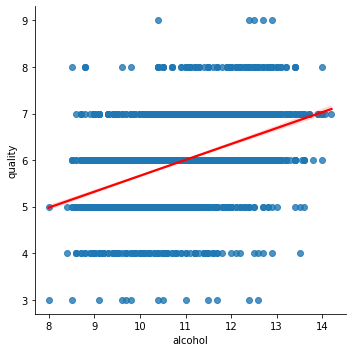

In [28]:
sns.lmplot(data=white, x='fixed_acidity', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='volatile_acidity', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='citric_acid', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='residual_sugar', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='chlorides', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='free_sulfur_dioxide', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='density', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='pH', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='sulphates', y='quality', line_kws = {'color':'red'})
plt.show()
sns.lmplot(data=white, x='alcohol', y='quality', line_kws = {'color':'red'})
plt.show()

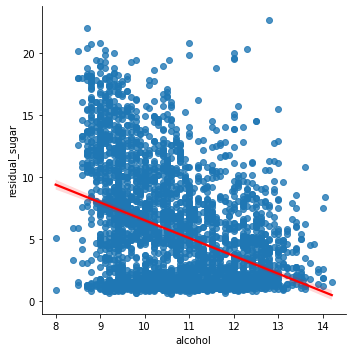

In [22]:
sns.lmplot(data=white, x='alcohol', y='residual_sugar', line_kws = {'color':'red'})
plt.show()

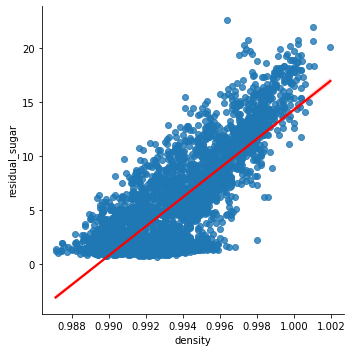

In [23]:
sns.lmplot(data=white, x='density', y='residual_sugar', line_kws = {'color':'red'})
plt.show()

<AxesSubplot:>

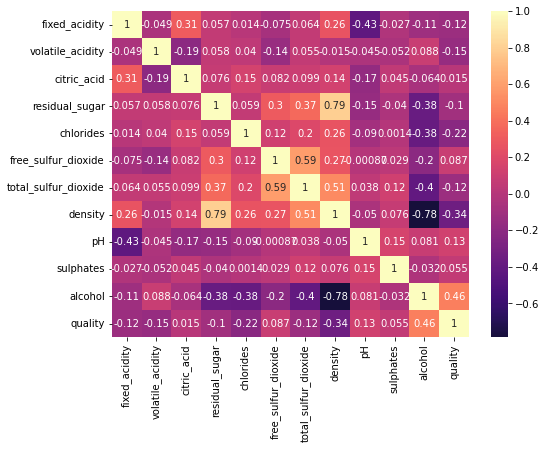

In [24]:

plt.figure(figsize=(8,6))
sns.heatmap(white.corr(), cmap='magma', center= 0, annot=True)

In [25]:
white.shape

(3601, 12)